In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df=pd.read_table(filepath_or_buffer="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv", delimiter=',')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
X=df['Hours']

In [6]:
Y=df['Scores']

In [7]:
X=pd.DataFrame(X)

In [8]:
Y=pd.DataFrame(Y)

In [9]:

X.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
Y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [11]:
X=np.array(X)
Y=np.array(Y)

In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

"""random_grid = {
    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'learning_rate' : [ float(x) for x in [0.001, 0.01, 0.05, 0.1]],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

print(random_grid)

clf = XGBRegressor()

model = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = 1)"""



"random_grid = {\n    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],\n    'learning_rate' : [ float(x) for x in [0.001, 0.01, 0.05, 0.1]],\n    'min_child_weight':[4,5], \n    'gamma':[i/10.0 for i in range(3,6)],  \n    'subsample':[i/10.0 for i in range(6,11)],\n    'colsample_bytree':[i/10.0 for i in range(6,11)], \n    'max_depth': [2,3,4,6,7],\n    'objective': ['reg:squarederror', 'reg:tweedie'],\n    'booster': ['gbtree', 'gblinear'],\n    'eval_metric': ['rmse'],\n    'eta': [i/10.0 for i in range(3,6)],\n}\n\nprint(random_grid)\n\nclf = XGBRegressor()\n\nmodel = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = 1)"

In [15]:
"""model.fit(X_train, Y_train, eval_metric='logloss')"""

"model.fit(X_train, Y_train, eval_metric='logloss')"

In [16]:
"""model.best_params_"""

'model.best_params_'

In [17]:
finalmodel=XGBRegressor()

In [18]:
finalmodel.fit(X, Y)

[04:14:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
from sklearn.metrics import mean_absolute_error
predictions =finalmodel.predict(X) 
mae = mean_absolute_error(Y, predictions) 

print("Root Mean Absolute Error:" , mae)

Root Mean Absolute Error: 0.9833512878417969


In [20]:
finalmodel.predict([9])

array([94.44364], dtype=float32)

In [21]:
predictions=np.round(predictions)

In [22]:
predictions=pd.DataFrame(predictions)

In [23]:
predictions

,0
0,26.0
1,49.0
2,27.0
3,75.0
4,31.0
5,20.0
6,88.0
7,60.0
8,81.0
9,27.0


In [24]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [25]:
Y=pd.DataFrame(Y)

In [26]:
Y

,0
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [27]:
resdf=pd.DataFrame({'Original':Y[0], 'Predicted':predictions[0]})

In [28]:
resdf

,Original,Predicted
0,21,26.0
1,47,49.0
2,27,27.0
3,75,75.0
4,30,31.0
5,20,20.0
6,88,88.0
7,60,60.0
8,81,81.0
9,25,27.0


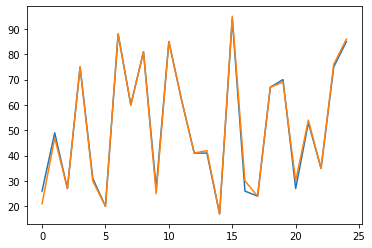

In [29]:
from matplotlib import pyplot as plt

plt.plot(predictions)
plt.plot(Y)
plt.show()

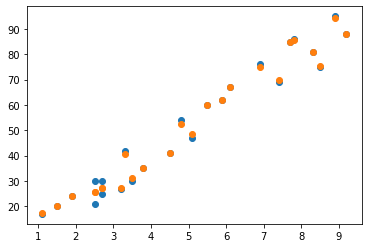

In [34]:
plt.scatter(X,Y)
plt.scatter(X,finalmodel.predict(X))
plt.show()